# Restaurant Data ( Zomato )

<br>

The Zomato API is a service provided by Zomato that allows developers to access a variety of information related to restaurants, including details about specific restaurants, collections of restaurants, restaurant reviews, and restaurant ratings.

Here are some of the things you can do with the Zomato API:

Search: You can use the Zomato API to search for restaurants based on a variety of parameters, including the restaurant's name, its location, the type of cuisine it offers, and more.

Restaurant Details: The API allows you to retrieve detailed information about a specific restaurant. This can include the restaurant's address, operating hours, average cost, menu, user ratings, and reviews.

Collections: Zomato organizes restaurants into collections based on themes, such as 'Romantic Restaurants', 'Rooftop Restaurants', 'Healthy Eating', and more. The API allows you to retrieve information about these collections.

Reviews: The API provides access to user-generated reviews and ratings for restaurants.

Cuisines: You can use the API to retrieve a list of cuisines available in a particular city or locality.

Locations: The API can provide details about different locations, including popular localities in a city, their top-rated restaurants, and more.

<br>

<br>

***We will get the top 5 and bottom 5 localities in Delhi NCR based on ratings , popularity , variety of cuisines and cost per meal***


`Note` : This Data was scraped in October 2020 , this exercise is to show how  one can leverage data which impacts us daily

<br>

In [41]:
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

df = pd.read_csv(r'../offline/data/delhi_scraped.csv',encoding='ISO-8859-1', error_bad_lines=False)
df.head(5)

b'Skipping line 5222: expected 63 fields, saw 64\nSkipping line 10380: expected 63 fields, saw 73\nSkipping line 10862: expected 63 fields, saw 64\nSkipping line 15288: expected 63 fields, saw 64\n'
b'Skipping line 19415: expected 63 fields, saw 64\nSkipping line 22485: expected 63 fields, saw 64\nSkipping line 23543: expected 63 fields, saw 64\nSkipping line 26269: expected 63 fields, saw 64\nSkipping line 29681: expected 63 fields, saw 64\n'


,apikey,id,name,url,switch_to_order_menu,cuisines,timings,average_cost_for_two,price_range,currency,...,user_rating.votes,all_reviews.reviews,order_url,order_deeplink,medio_provider,zomato_events,book_url,user_rating.custom_rating_text,user_rating.custom_rating_text_background,user_rating.rating_tool_tip
0,bb1e1111c5820027c0f749c14562d1e2,19028853,Cafe AV,https://www.zomato.com/ncr/cafe-av-indirapuram...,0.0,"South Indian, North Indian, Fast Food",12 Noon to 10 PM,300.0,1.0,Rs.,...,35.0,"[{'review': []}, {'review': []}, {'review': []...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bb1e1111c5820027c0f749c14562d1e2,19290999,Pie R Eats,https://www.zomato.com/ncr/pie-r-eats-vasundha...,0.0,Fast Food,10:30 AM to 10:30 PM,200.0,1.0,Rs.,...,11.0,"[{'review': []}, {'review': []}, {'review': []...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bb1e1111c5820027c0f749c14562d1e2,19159931,The Acai Place,https://www.zomato.com/ncr/the-acai-place-sush...,0.0,"Healthy Food, Coffee, Beverages",11am  9pm (Mon-Sun),550.0,2.0,Rs.,...,24.0,"[{'review': []}, {'review': []}, {'review': []...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bb1e1111c5820027c0f749c14562d1e2,19291006,Thirsty Frog,https://www.zomato.com/ncr/thirsty-frog-saket-...,0.0,"Fast Food, Beverages",11 AM to 11 PM,150.0,1.0,Rs.,...,0.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bb1e1111c5820027c0f749c14562d1e2,19159937,Sanjay Pastry Shop,https://www.zomato.com/ncr/sanjay-pastry-shop-...,0.0,"Bakery, Fast Food, Street Food",11 AM to 10 PM,200.0,1.0,Rs.,...,54.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`apikey`: Unique identifiers for the API keys used to access the data. There are 45 unique keys present.

`id`: Unique identifiers for the restaurants. There are 39,221 unique IDs.

`name`: The names of the restaurants. "Domino's Pizza" is the most common name, appearing 194 times.

`url`: The URLs of the restaurants on Zomato. All URLs are unique.

`switch_to_order_menu`: A boolean variable that is always 0 (False), indicating that the order menu is not being switched to.

`price_range`: The price range of the restaurants, where 1 is cheap and 4 is expensive. The average price range is 1.8, indicating a mix of cheap and moderately priced restaurants.

`cuisines`: The types of cuisine served at the restaurants. The most common cuisine is "North Indian".

`average_cost_for_two`: The average cost for two people to eat at the restaurant. The average cost is around 594.7.

`currency`: The currency in which the cost is reported. All costs are reported in Indian Rupees (INR).

`is_expensive`: A boolean variable indicating whether the restaurant is considered expensive (defined as having an average cost for two people above 2000). Most restaurants (38,838 out of 39,221) are not considered expensive.

`locality_from_verbose`: The locality of the restaurant derived from the 'location.locality_verbose' field. The most common locality is "Rohini".

`cuisines`: Lists the types of cuisine that the restaurant serves.

`timings`: Specifies the opening hours of the restaurant.

`average_cost_for_two`: The average cost for two people to eat at the restaurant.

`price_range`: A number from 1 to 4 indicating the price range of the restaurant, where 1 is cheap and 4 is expensive.

`highlights`: Lists the special features or services the restaurant offers, such as delivery, takeaway, or outdoor seating.

`offers`: Lists any special offers the restaurant has available.

`opentable_support`: Indicates whether the restaurant supports reservations through OpenTable.

`is_zomato_book_res`: Indicates whether the restaurant supports reservations through Zomato.

`mezzo_provider`: The provider of the restaurant's online ordering system.

`is_book_form_web_view`: Indicates whether the restaurant supports online reservations.

`book_form_web_view_url`: The URL for making online reservations at the restaurant.

`thumb`: The URL of a thumbnail image of the restaurant.

`user_rating`: Contains several sub-columns related to user ratings, such as aggregate_rating (the restaurant's average rating), rating_text (a text description of the rating), and votes (the number of votes the restaurant has received).

`all_reviews_count`: The total number of reviews the restaurant has received.

`photos_url`: The URL of the restaurant's photo gallery on Zomato.

`photo_count`: The number of photos available for the restaurant on Zomato.

`menu_url`: The URL of the restaurant's menu on Zomato.

`featured_image`: The URL of a featured image of the restaurant.

`has_online_delivery`: Indicates whether the restaurant offers online delivery.

`is_delivering_now`: Indicates whether the restaurant is currently delivering.

`store_type`: The type of the restaurant (e.g., casual dining, quick bites).

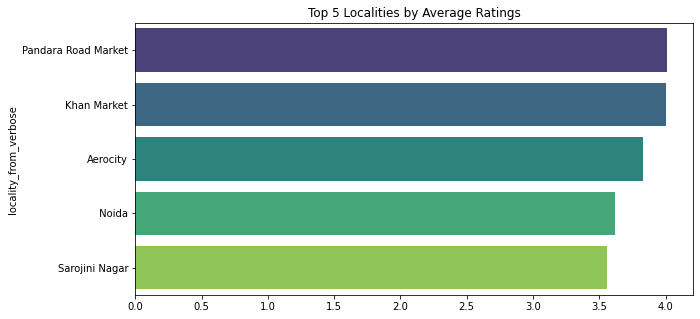

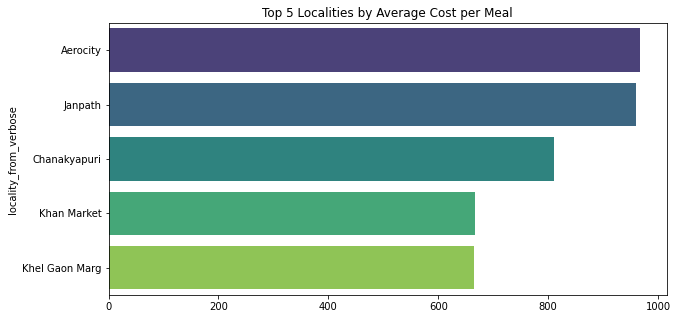

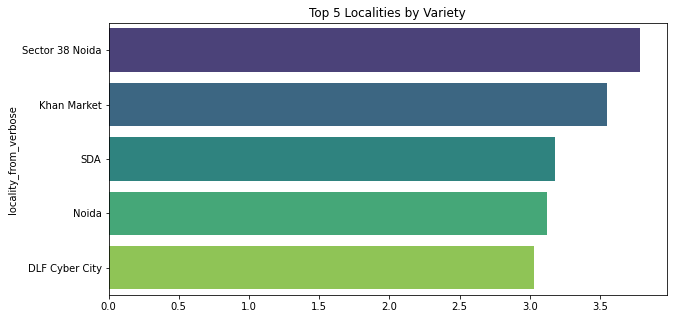

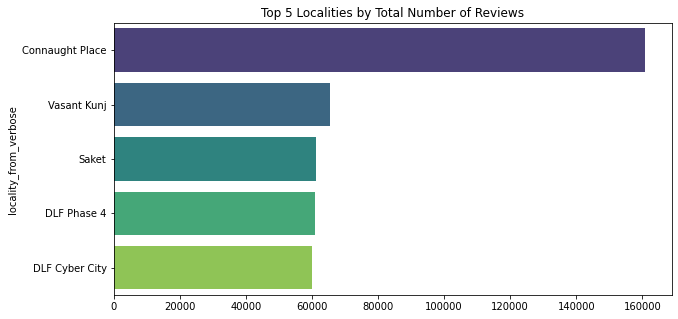

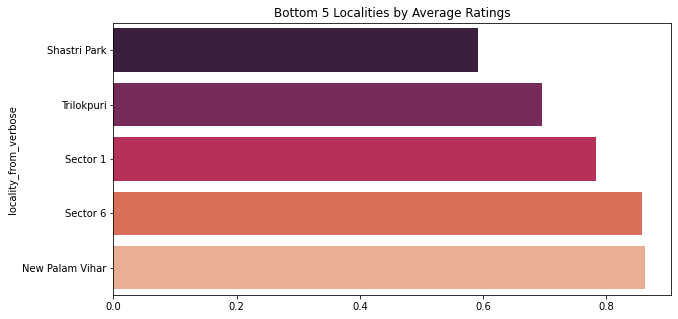

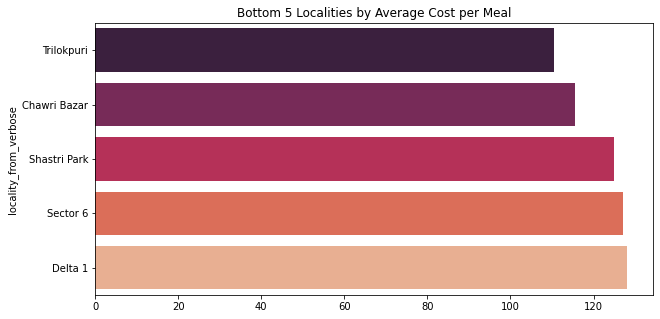

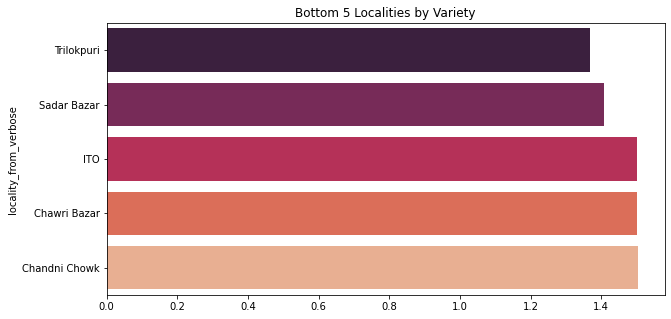

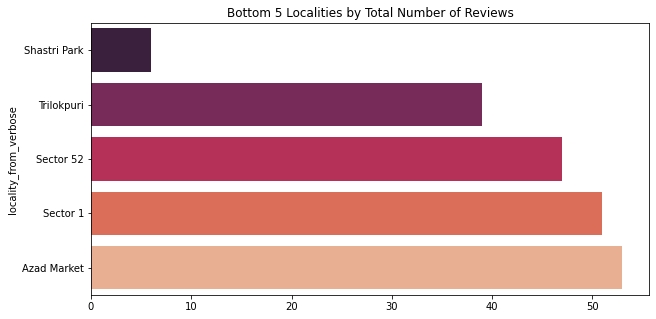

In [42]:
# Define a threshold for 'expensive' restaurants
cost_threshold = 2000
df['is_expensive'] = df['average_cost_for_two'] > cost_threshold

# Split 'location.locality_verbose' and get the second last element as locality
df['locality_from_verbose'] = df['location.locality_verbose'].apply(lambda x: x.split(', ')[-2])

# Filter localities with more than 10 restaurants
locality_counts = df['locality_from_verbose'].value_counts()
localities_with_more_than_10 = locality_counts[locality_counts > 10].index
df_filtered_localities = df[df['locality_from_verbose'].isin(localities_with_more_than_10)]

# Calculate cost per meal and number of cuisines for the filtered DataFrame
df_filtered_localities['cost_per_meal'] = df_filtered_localities['average_cost_for_two'] / 2
df_filtered_localities['num_cuisines'] = df_filtered_localities['cuisines'].apply(lambda x: len(str(x).split(', ')))
# Calculate the total number of reviews for each locality with more than 10 restaurants
grouped_reviews = df_filtered_localities.groupby('locality_from_verbose')['all_reviews_count'].sum()

# Group by locality and calculate the mean values for each metric
grouped = df_filtered_localities.groupby('locality_from_verbose').agg({
    'user_rating.aggregate_rating': 'mean',
    'cost_per_meal': 'mean',
    'num_cuisines': 'mean',
})



# Get the top and bottom 5 localities by total number of reviews
top_5_localities_by_reviews = grouped_reviews.sort_values(ascending=False).head(5)
bottom_5_localities_by_reviews = grouped_reviews.sort_values(ascending=True).head(5)

# Get the top and bottom 5 localities for each metric
top_5_localities_by_ratings = grouped['user_rating.aggregate_rating'].sort_values(ascending=False).head(5)
bottom_5_localities_by_ratings = grouped['user_rating.aggregate_rating'].sort_values(ascending=True).head(5)

top_5_localities_by_cost = grouped['cost_per_meal'].sort_values(ascending=False).head(5)
bottom_5_localities_by_cost = grouped['cost_per_meal'].sort_values(ascending=True).head(5)

top_5_localities_by_variety = grouped['num_cuisines'].sort_values(ascending=False).head(5)
bottom_5_localities_by_variety = grouped['num_cuisines'].sort_values(ascending=True).head(5)

# Generate bar plots for the top and bottom 5 localities for each criterion

# Helper function to generate a bar plot
def generate_bar_plot(data, title, color):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 5))
    sns.barplot(x=data.values, y=data.index, palette=color)
    plt.title(title)
    plt.show()

# Generate bar plots for the top 5 localities
generate_bar_plot(top_5_localities_by_ratings, 'Top 5 Localities by Average Ratings', 'viridis')
generate_bar_plot(top_5_localities_by_cost, 'Top 5 Localities by Average Cost per Meal', 'viridis')
generate_bar_plot(top_5_localities_by_variety, 'Top 5 Localities by Variety', 'viridis')
generate_bar_plot(top_5_localities_by_reviews, 'Top 5 Localities by Total Number of Reviews', 'viridis')

# Generate bar plots for the bottom 5 localities
generate_bar_plot(bottom_5_localities_by_ratings, 'Bottom 5 Localities by Average Ratings', 'rocket')
generate_bar_plot(bottom_5_localities_by_cost, 'Bottom 5 Localities by Average Cost per Meal', 'rocket')
generate_bar_plot(bottom_5_localities_by_variety, 'Bottom 5 Localities by Variety', 'rocket')
generate_bar_plot(bottom_5_localities_by_reviews, 'Bottom 5 Localities by Total Number of Reviews', 'rocket')


# ZOMATO TRENDS

<br>

What is Zomato Food Trends?

Restaurants need to make crucial decisions regarding the location of the store, the cuisine specialization, menu pricing, and more. In this dynamic industry, a data driven approach towards such decisions can assure, accelerate and amplify success.

Zomato Food Trends provides insights by analyzing the data from millions of transactions across hundreds of cities in India. Restaurant partners can leverage this platform to view:

Demand and supply gaps, zoomed-in to a locality level
Price distribution and demand trends for different dishes or cuisines
Demand-supply comparison for multiple dishes or cuisines

<br>

<img src="../offline/images/zomato.png" alt="Google Trends_" class="centre">

***We have a demand data for 6 major cities - Delhi NCR , Chennai , Mumbai ,Hyderabad , Bengaluru and Kolkata from Jun-2022 to May-2023***

In [48]:
import pandas as pd
df = pd.read_csv(r'../offline/data/zomato_data.csv')
df

,City,Cuisine,May-2023,Apr-2023,Mar-2023,Feb-2023,Jan-2023,Dec-2022,Nov-2022,Oct-2022,Sep-2022,Aug-2022,Jul-2022
0,"Mumbai, Maharashtra",Demand: Afghan,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Hyderabad, Telangana",Demand: Afghan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Chennai, Tamil Nadu",Demand: Afghan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Kolkata, West Bengal",Demand: Afghan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bengaluru, Karnataka",Demand: Afghan,76.81,100.00,84.29,70.57,39.15,43.89,59.85,56.11,51.12,45.89,66.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,"Chennai, Tamil Nadu",Demand: Wraps,16.72,16.78,19.45,16.98,42.44,100.00,89.78,22.86,16.32,10.07,10.45
506,"Hyderabad, Telangana",Demand: Wraps,48.68,49.69,100.00,90.30,80.63,87.07,50.92,51.01,40.21,38.18,35.84
507,"Bengaluru, Karnataka",Demand: Wraps,5.58,14.41,69.43,94.84,100.00,92.48,3.36,4.53,5.04,5.39,5.05
508,"Kolkata, West Bengal",Demand: Wraps,68.98,90.95,71.68,60.11,44.71,26.44,18.63,15.16,13.63,10.05,100.00


<br>
The dataset appears to include the following columns:

    
    
`City`: The city and state in which the orders are being made.

`Cuisine`: The type of cuisine/dish for which the demand is measured.

`May-2023 to Jul-2022`: The demand for each month from July 2022 to May 2023. It seems like missing values (NaN) indicate no data is available for that particular month.

`Demand number of 100` indicates the region with the largest order volume for the specified dish/cuisine
<br>

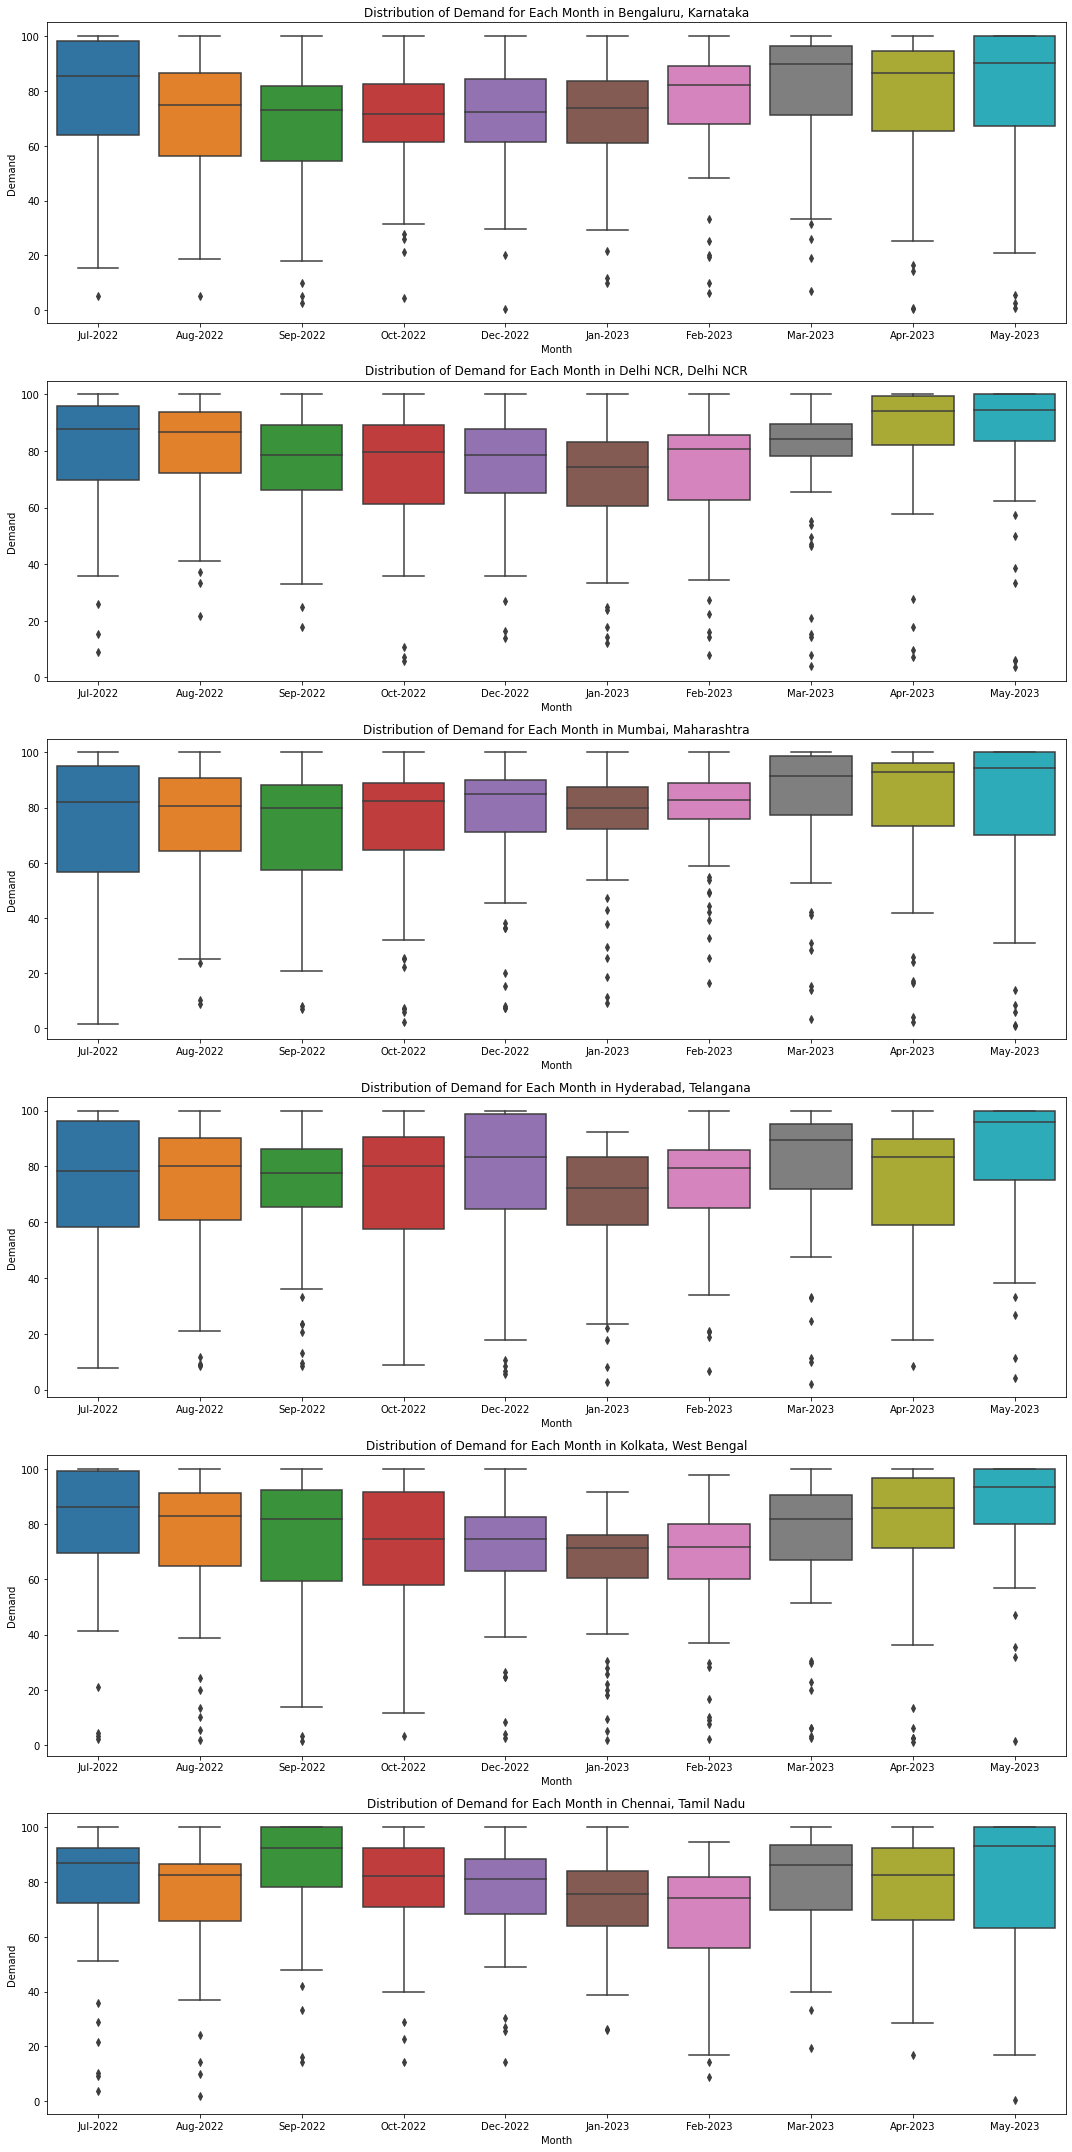

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a new dataframe for visualization with each row representing a city-cuisine-month combination
visualization_df_monthly = df.melt(id_vars=['City', 'Cuisine'], value_vars=['Jul-2022', 'Aug-2022', 'Sep-2022', 'Oct-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023'], var_name='Month', value_name='Demand')

# Remove rows with NaN demand
visualization_df_monthly = visualization_df_monthly.dropna()

# Create a separate plot for each city
cities = visualization_df_monthly['City'].unique()
num_cities = len(cities)
fig, axs = plt.subplots(num_cities, 1, figsize=(15, 5*num_cities))

for i, city in enumerate(cities):
    city_df = visualization_df_monthly[visualization_df_monthly['City'] == city]
    sns.boxplot(x='Month', y='Demand', data=city_df, ax=axs[i])
    axs[i].set_title(f'Distribution of Demand for Each Month in {city}')

plt.tight_layout()
plt.show()

`The above visualizations are boxplots showing the distribution of demand for each month, separately for each of the top 10 cuisines with the highest overall average demand. They provide an overview of the variability in demand over time for these cuisines`.


<br>
Each boxplot represents a month and shows the median (the line inside the box), the interquartile range (the size of the box), and the range (the whiskers or lines extending from the box) of the demand. Outliers, if any, are shown as individual points outside the whiskers.
<br>

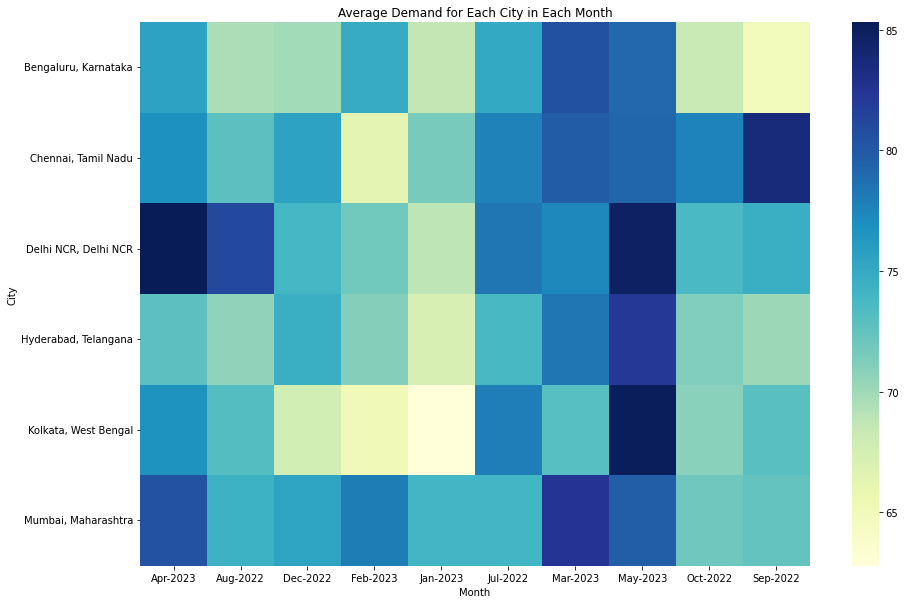

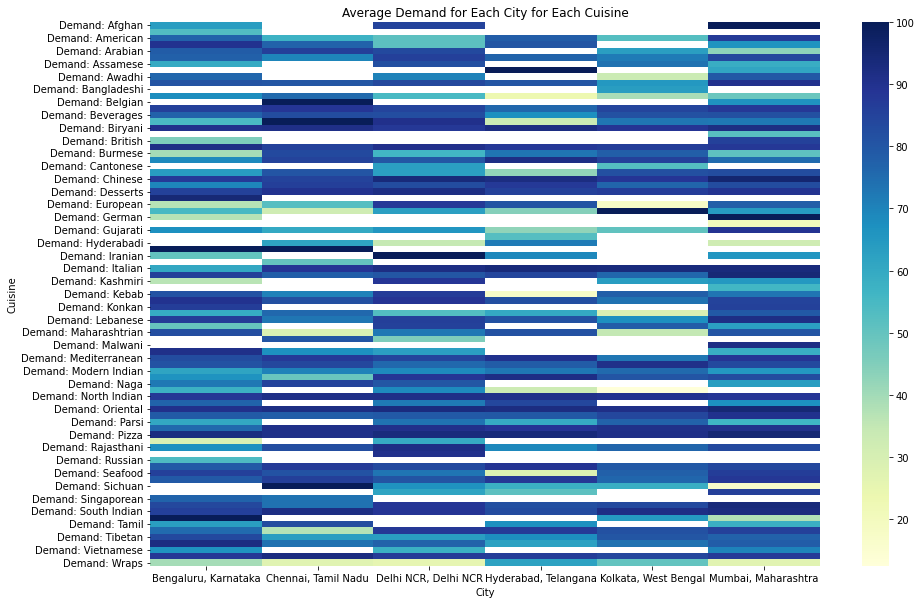

In [52]:
# Create a pivot table for the heatmap
pivot_df_monthly_city = visualization_df_monthly.pivot_table(index='City', columns='Month', values='Demand')

# Create a heatmap to visualize the average demand for each city in each month
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df_monthly_city, cmap='YlGnBu')
plt.title('Average Demand for Each City in Each Month')
plt.show()

# Create a heatmap to visualize the average demand for each cuisine in each city

pivot_df_cuisine_city = visualization_df_monthly.pivot_table(index='Cuisine', columns='City', values='Demand')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_df_cuisine_city, cmap='YlGnBu')
plt.title('Average Demand for Each City for Each Cuisine')
plt.show()

<br>

The above heatmaps provide a visual representation of the average demand data.

The first heatmap shows the average demand for each city in each month. Cities are on the y-axis, and months are on the x-axis. The color of each cell indicates the average demand, with darker colors representing higher demand.

The second heatmap shows the average demand for each city for each cuisine. Cuisines are on the y-axis, and cities are on the x-axis. Again, the color of each cell indicates the average demand, with darker colors representing higher demand. This can help you see in which cities each cuisine is most in demand.

white spaces on the heatmap indicate that the data for that particular combination of city/cuisine is not available.

<br>

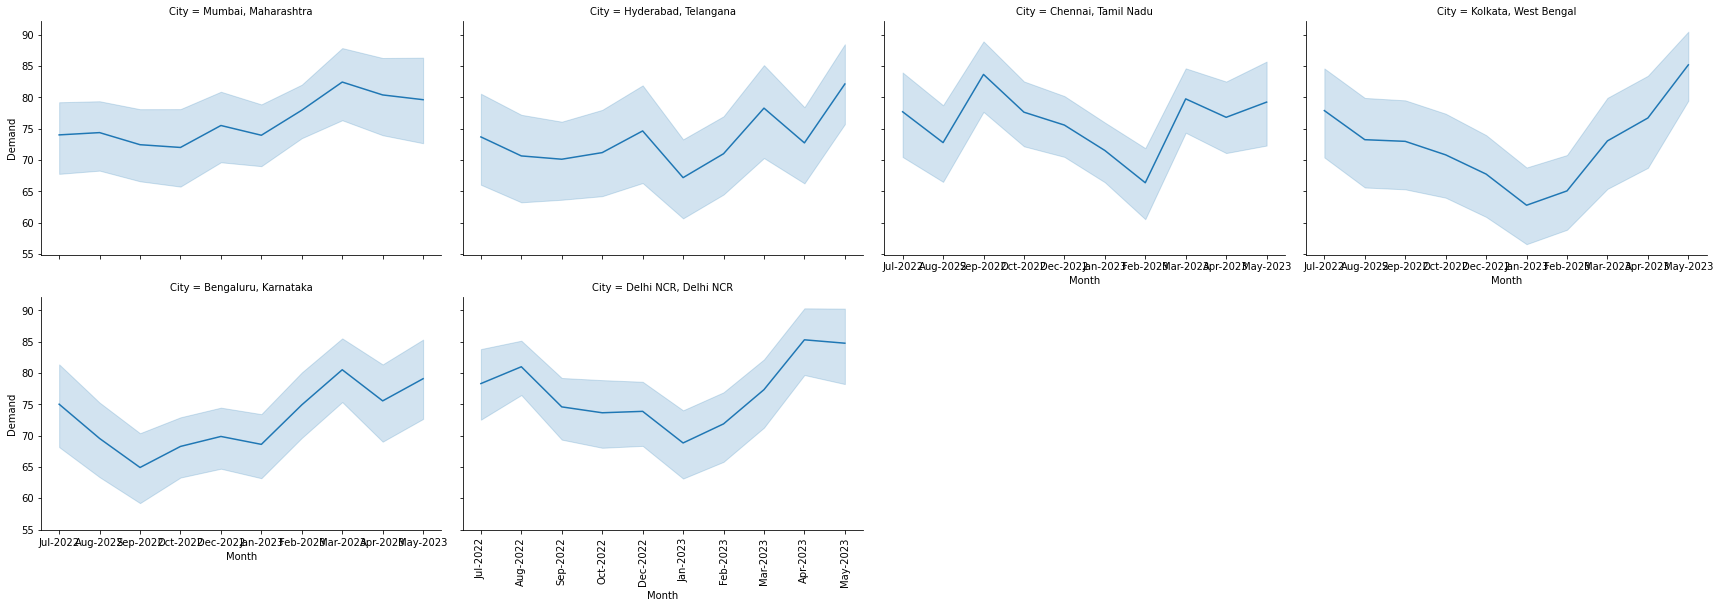

In [60]:
# Convert the 'Cuisine' column into just the cuisine name by removing the 'Demand: ' part
df['Cuisine'] = df['Cuisine'].str.replace('Demand: ', '')

# Generate the monthly demand
df_monthly = df.melt(id_vars=['City', 'Cuisine'], value_vars=['Jul-2022', 'Aug-2022', 'Sep-2022', 'Oct-2022', 'Dec-2022', 'Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023'], var_name='Month', value_name='Demand')

# Filter to include only the top 10 cuisines with the highest average demand
top_cuisines = df_monthly.groupby('Cuisine')['Demand'].mean().nlargest(30).index
top_cuisines_df = df_monthly[df_monthly['Cuisine'].isin(top_cuisines)]

# Facet Grid (Line Plot) for each City
g = sns.FacetGrid(df_monthly, col='City', col_wrap=4, height=4, aspect=1.5)
g = g.map(sns.lineplot, 'Month', 'Demand')
plt.xticks(rotation=90)
plt.show()

`A facet grid of line plots for each city, showing how demand has changed over time.`

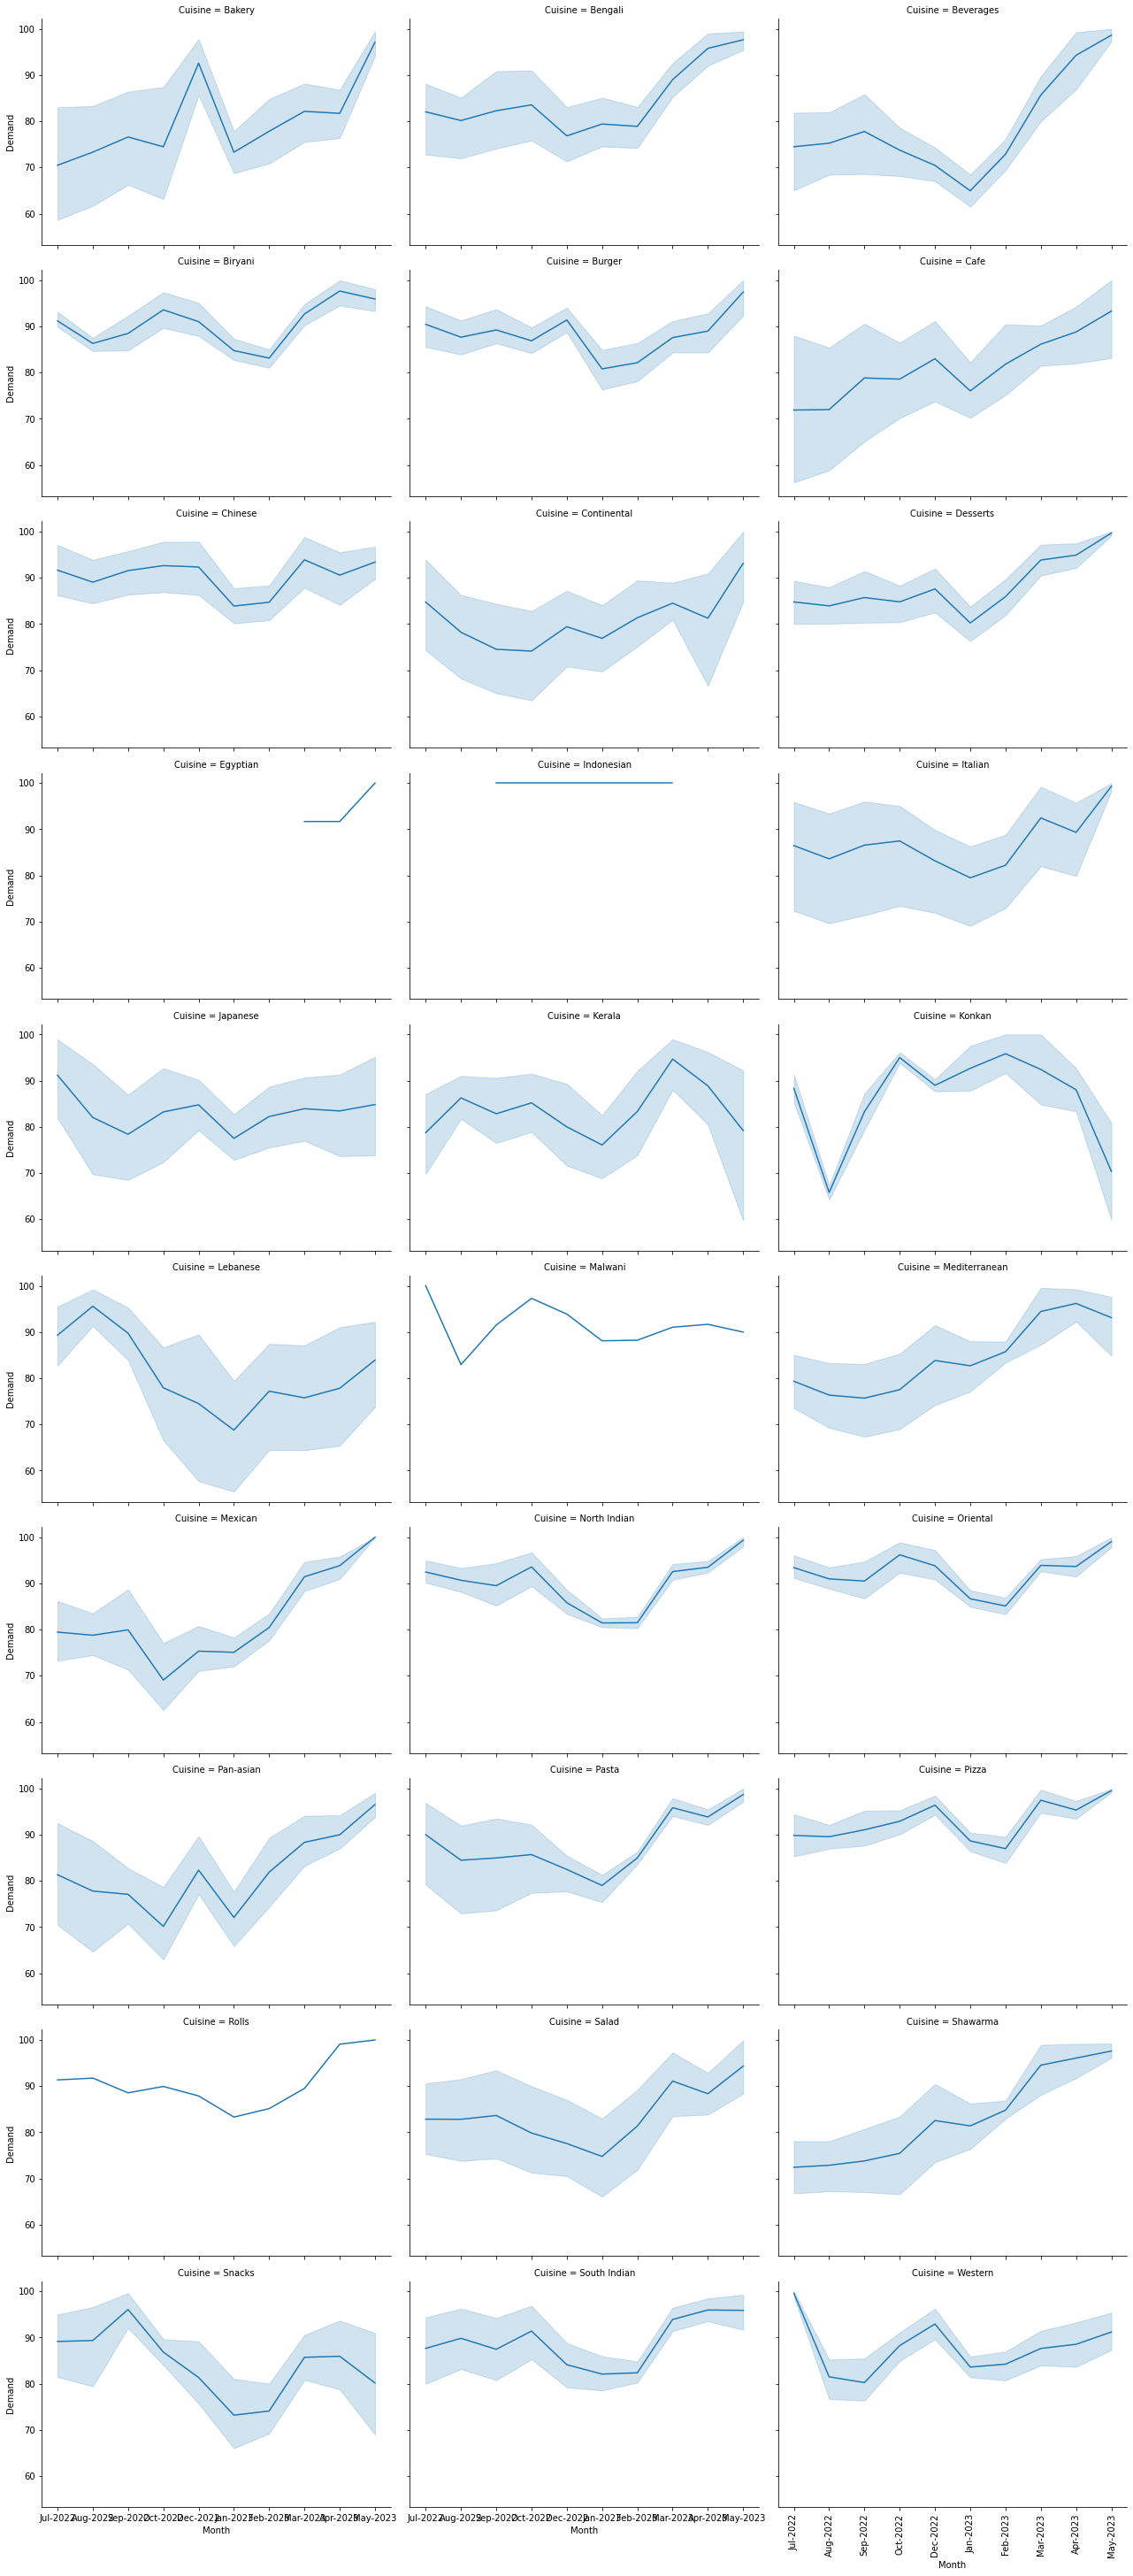

In [61]:
# Facet Grid (Line Plot) for each Cuisine (Top 30 Cuisines)
g = sns.FacetGrid(top_cuisines_df, col='Cuisine', col_wrap=3, height=4, aspect=1.5)
g = g.map(sns.lineplot, 'Month', 'Demand')
plt.xticks(rotation=90)
plt.show()

`A facet grid of line plots for each of the top 30 cuisines, showing how demand has changed over time.`